In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

In [2]:
df = pd.DataFrame.from_csv("D:/vit/Winter Semester'19/CSE3019-Data Mining/project/final/HR_data.csv", index_col=None)

C:\Users\SAKSHAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [6]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [7]:
df.shape

(14999, 10)

In [8]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [9]:
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [10]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


Positive examples = 3571
Negative examples = 11428
Proportion of positive to negative examples = 31.25%


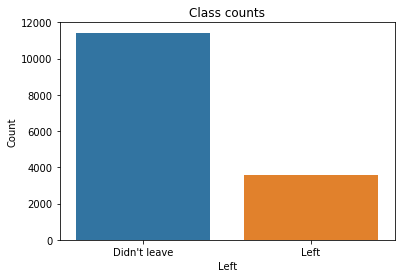

In [11]:
pos = df[df["turnover"] == 1].shape[0]
neg = df[df["turnover"] == 0].shape[0]
print("Positive examples = {}".format(pos))
print("Negative examples = {}".format(neg))
print("Proportion of positive to negative examples = {:.2f}%".format((pos / neg) * 100))
sns.countplot(df["turnover"])
plt.xticks((0, 1), ["Didn't leave", "Left"])
plt.xlabel("Left")
plt.ylabel("Count")
plt.title("Class counts");

In [12]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:
corr = df.corr()
corr = (corr)
corr

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

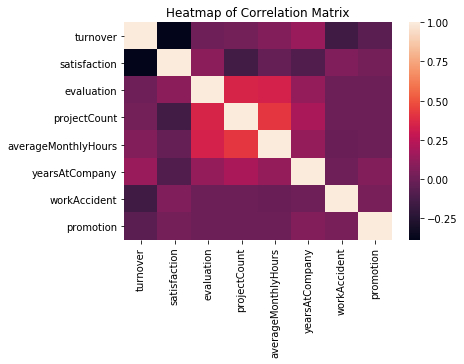

In [14]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Heatmap of Correlation Matrix')

In [15]:
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


In [16]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.109488943484457, pvalue=9.012781195378076e-279)

In [17]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


Text(0, 0.5, 'Employee Count')

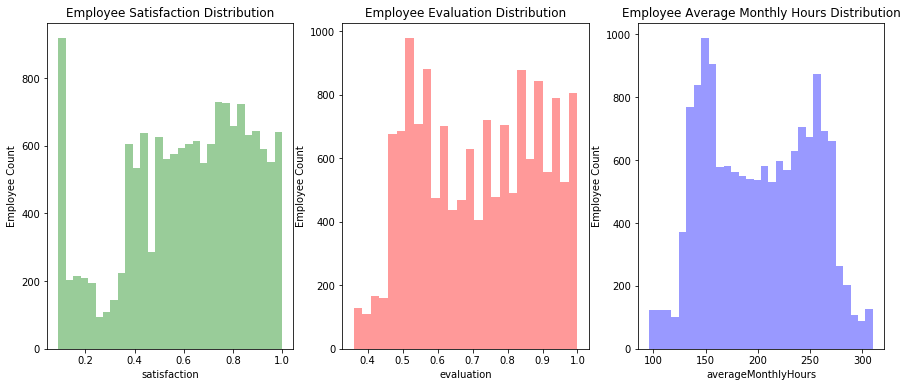

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

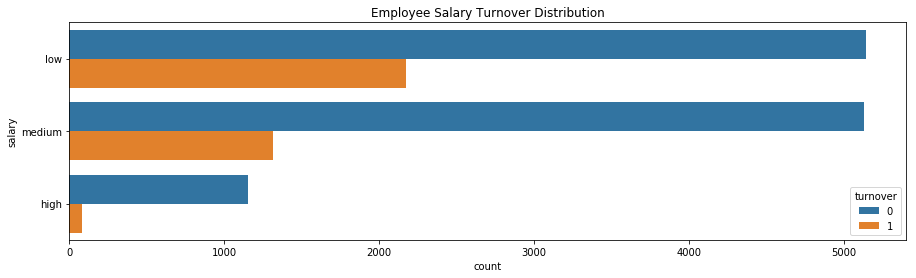

In [19]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

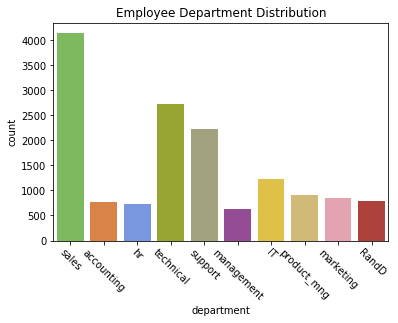

In [20]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

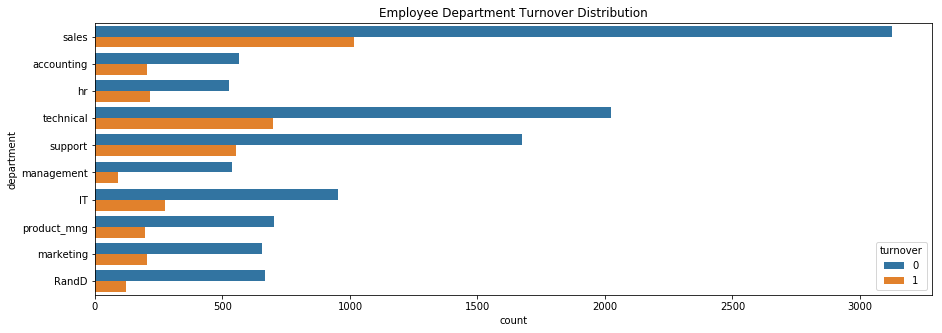

In [21]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

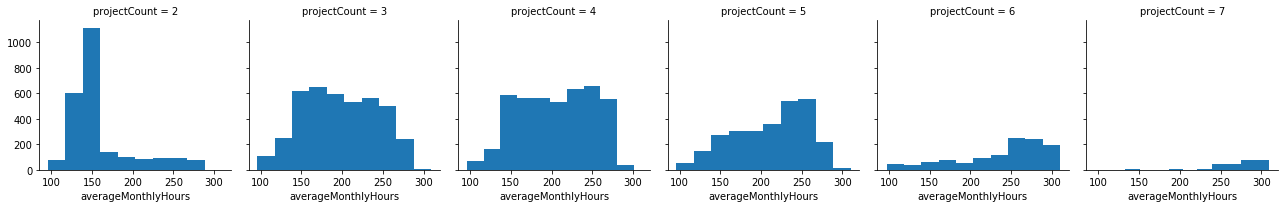

In [22]:
g = sns.FacetGrid(df, col='projectCount')
g.map(plt.hist, 'averageMonthlyHours', bins=10)


[Text(0, 0.5, 'Percent')]

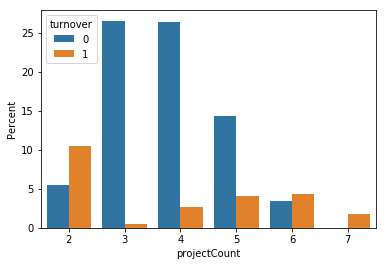

In [23]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

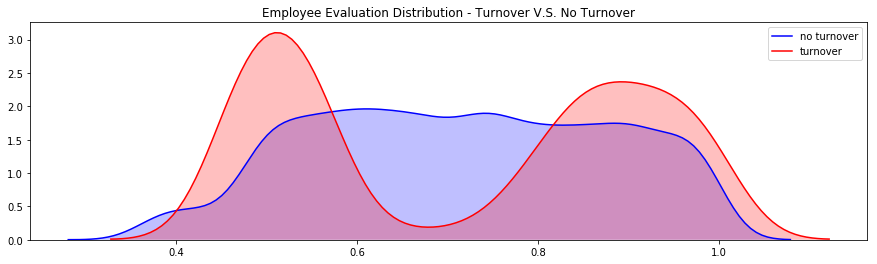

In [24]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

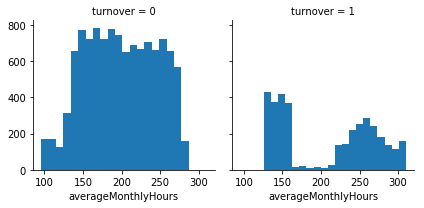

In [25]:
g = sns.FacetGrid(df, col='turnover')
g.map(plt.hist, 'averageMonthlyHours', bins=20)

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

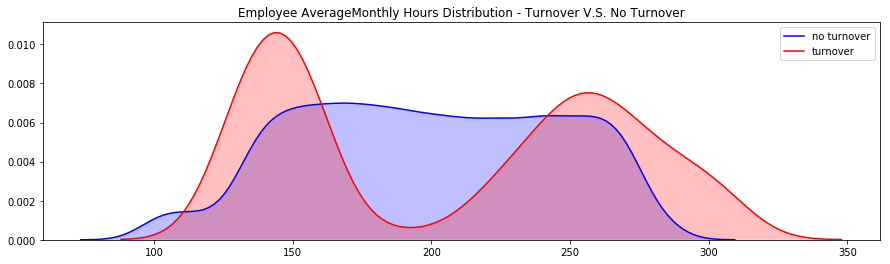

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

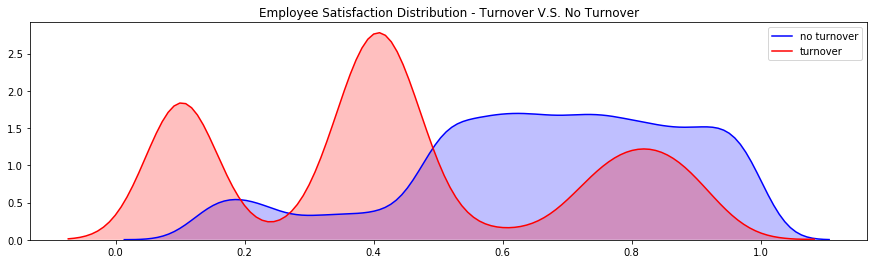

In [27]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

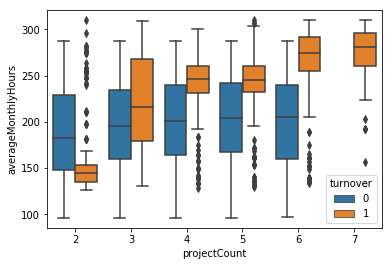

In [28]:
import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

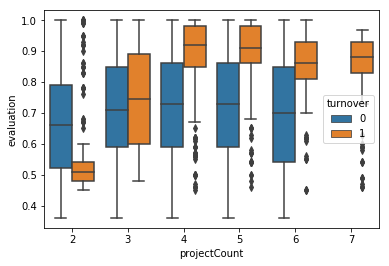

In [29]:
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

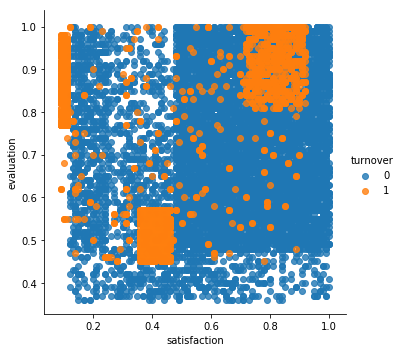

In [30]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

[Text(0, 0.5, 'Percent')]

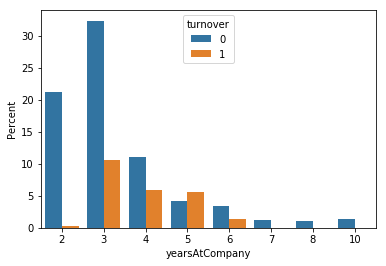

In [31]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

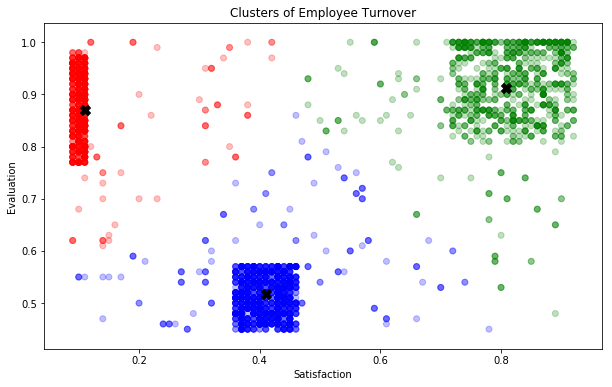

In [32]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()
#green=>hardworking happy
#blue=>hardworking sad
#red=>bad sad

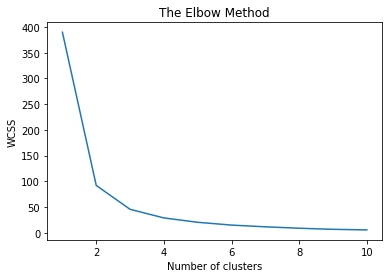

In [33]:
X = df.iloc[:,1:7].values
Y = df.iloc[:,[0]].values
X = (X - X.mean()) / (X.max() - X.min())
Y = (Y - Y.mean()) / (Y.max() - Y.min())
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create dummy variables for the 'department' and 'salary' features, since they are categorical 
department = pd.get_dummies(data=df['department'],drop_first=True,prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=df['salary'],drop_first=True,prefix='sal')
df.drop(['department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

In [35]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [36]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [37]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [38]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.79


C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

AUC: 0.829 (0.011)


C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Logistic Regression V.S. K Means V.S. Decision Tree V.S. K.N.N Model
***

In [40]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier   

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, base_rate_model(X_test)))
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, logis.predict(X_test)))
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, dtree.predict(X_test)))
print(classification_report(y_test, dtree.predict(X_test)))

# K Means
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
kmeans.fit(X_train,y_train)
print ("\n\n ---KMeans---")
kmeans_roc_auc = roc_auc_score(y_test, kmeans.predict(X_test))
print ("K Means AUC = %2.2f" % kmeans_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, kmeans.predict(X_test)))

print(classification_report(y_test, kmeans.predict(X_test)))

# K.N.N 9
knn9 = KNeighborsClassifier(n_neighbors=9)  
knn9.fit(X_train,y_train)
print ("\n\n ---KNN Model 9 neighbours---")
knn9_roc_auc = roc_auc_score(y_test, knn9.predict(X_test))
print ("KNN AUC = %2.2f" % knn9_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, knn9.predict(X_test)))

print(classification_report(y_test, knn9.predict(X_test)))

# K.N.N 7
knn7 = KNeighborsClassifier(n_neighbors=7)  
knn7.fit(X_train,y_train)
print ("\n\n ---KNN Model 7 neighbours---")
knn7_roc_auc = roc_auc_score(y_test, knn7.predict(X_test))
print ("KNN AUC = %2.2f" % knn7_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, knn7.predict(X_test)))

print(classification_report(y_test, knn7.predict(X_test)))

# K.N.N 5
knn5 = KNeighborsClassifier(n_neighbors=5)  
knn5.fit(X_train,y_train)
print ("\n\n ---KNN Model 5 neighbours---")
knn5_roc_auc = roc_auc_score(y_test, knn5.predict(X_test))
print ("KNN AUC = %2.2f" % knn5_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, knn5.predict(X_test)))
print(classification_report(y_test, knn5.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
Accuracy Score on test data:  0.761777777778
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

   micro avg       0.76      0.76      0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




 ---Logistic Model---
Logistic AUC = 0.78
Accuracy Score on test data:  0.764
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1714
           1       0.50      0.80      0.62       536

   micro avg       0.76      0.76      0.76      2250
   macro avg       0.71      0.78      0.72      2250
weighted avg       0.82      0.76      0.78      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
Accuracy Score on test data:  0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1714
           1       0.92      0.91      0.92       536

   micro avg       0.96      0.96      0.96      2250
   macro avg       0.95      0.94      0.94      2250
weighted avg       0.96      0.96      0.96      2250



 ---KMeans---
K Means AUC = 0.69
Accuracy Score on test data:  0.761333333333
              precision    recall  f1-score   support

           0       0.85      0.83      0.8

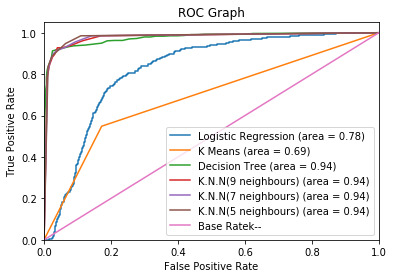

In [41]:
# Create ROC Graph
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
kmeans_fpr, kmeans_tpr, kmeans_thresholds = roc_curve(y_test, kmeans.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
knn9_fpr, knn9_tpr, knn9_thresholds = roc_curve(y_test, knn9.predict_proba(X_test)[:,1])
knn7_fpr, knn7_tpr, knn7_thresholds = roc_curve(y_test, knn7.predict_proba(X_test)[:,1])
knn5_fpr, knn5_tpr, knn5_thresholds = roc_curve(y_test, knn5.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot K Means ROC
plt.plot(kmeans_fpr, kmeans_tpr, label='K Means (area = %0.2f)' % kmeans_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot K.N.N ROC for 9,7 and 5 neighbours
plt.plot(knn9_fpr, knn9_tpr, label='K.N.N(9 neighbours) (area = %0.2f)' % knn9_roc_auc)
plt.plot(knn7_fpr, knn7_tpr, label='K.N.N(7 neighbours) (area = %0.2f)' % knn7_roc_auc)
plt.plot(knn5_fpr, knn5_tpr, label='K.N.N(5 neighbours) (area = %0.2f)' % knn5_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

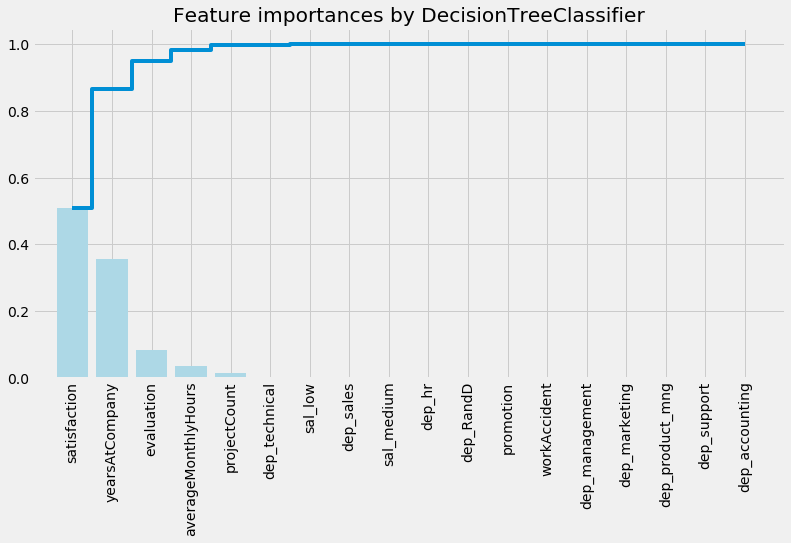

In [42]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [43]:
'''
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Employee Turnover") 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feat_names,  
                         class_names='turnover',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
'''

'\nimport graphviz \nfrom sklearn import tree\ndot_data = tree.export_graphviz(dtree, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("Employee Turnover") \n\ndot_data = tree.export_graphviz(dtree, out_file=None, \n                         feature_names=feat_names,  \n                         class_names=\'turnover\',  \n                         filled=True, rounded=True,  \n                         special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph\n'

In [44]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
X=df.iloc[:,[0,1,4]]
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [45]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [46]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [47]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 1.00


C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier   

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, base_rate_model(X_test)))
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, logis.predict(X_test)))
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, dtree.predict(X_test)))
print(classification_report(y_test, dtree.predict(X_test)))

# K Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
kmeans.fit(X_train,y_train)
print ("\n\n ---KMeans---")
kmeans_roc_auc = roc_auc_score(y_test, kmeans.predict(X_test))
print ("K Means AUC = %2.2f" % kmeans_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, kmeans.predict(X_test)))
print(classification_report(y_test, kmeans.predict(X_test)))

# K.N.N 9
knn9 = KNeighborsClassifier(n_neighbors=9)  
knn9.fit(X_train,y_train)
print ("\n\n ---KNN Model 9 neighbours---")
knn9_roc_auc = roc_auc_score(y_test, knn9.predict(X_test))
print ("KNN AUC = %2.2f" % knn9_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, knn9.predict(X_test)))
print(classification_report(y_test, knn9.predict(X_test)))

# K.N.N 7
knn7 = KNeighborsClassifier(n_neighbors=7)  
knn7.fit(X_train,y_train)
print ("\n\n ---KNN Model 7 neighbours---")
knn7_roc_auc = roc_auc_score(y_test, knn7.predict(X_test))
print ("KNN AUC = %2.2f" % knn7_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, knn7.predict(X_test)))
print(classification_report(y_test, knn7.predict(X_test)))

# K.N.N 5
knn5 = KNeighborsClassifier(n_neighbors=5)  
knn5.fit(X_train,y_train)
print ("\n\n ---KNN Model 5 neighbours---")
knn5_roc_auc = roc_auc_score(y_test, knn5.predict(X_test))
print ("KNN AUC = %2.2f" % knn5_roc_auc)
print('Accuracy Score on test data: ',accuracy_score(y_test, knn5.predict(X_test)))
print(classification_report(y_test, knn5.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
Accuracy Score on test data:  0.761777777778
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

   micro avg       0.76      0.76      0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 1.00
Accuracy Score on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00       536

   micro avg       1.00      1.00      1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



 ---Decision Tree Model---


C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Decision Tree AUC = 1.00
Accuracy Score on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00       536

   micro avg       1.00      1.00      1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



 ---KMeans---
K Means AUC = 0.32
Accuracy Score on test data:  0.257777777778
              precision    recall  f1-score   support

           0       0.65      0.25      0.36      1714
           1       0.58      0.28      0.38       536
           2       0.00      0.00      0.00         0

   micro avg       0.26      0.26      0.26      2250
   macro avg       0.41      0.18      0.25      2250
weighted avg       0.63      0.26      0.37      2250



 ---KNN Model 9 neighbours---


C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\SAKSHAM\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


KNN AUC = 1.00
Accuracy Score on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00       536

   micro avg       1.00      1.00      1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



 ---KNN Model 7 neighbours---
KNN AUC = 1.00
Accuracy Score on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00       536

   micro avg       1.00      1.00      1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



 ---KNN Model 5 neighbours---
KNN AUC = 1.00
Accuracy Score on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00   

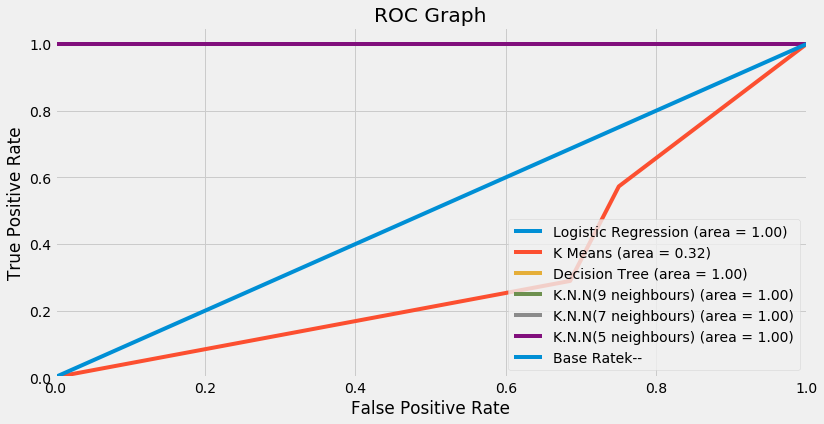

In [49]:
# Create ROC Graph
from sklearn.metrics import roc_curve
for i in kmeans.predict(X_test):
    f

fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
kmeans_fpr, kmeans_tpr, kmeans_thresholds = roc_curve(y_test, kmeans.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
knn9_fpr, knn9_tpr, knn9_thresholds = roc_curve(y_test, knn9.predict_proba(X_test)[:,1])
knn7_fpr, knn7_tpr, knn7_thresholds = roc_curve(y_test, knn7.predict_proba(X_test)[:,1])
knn5_fpr, knn5_tpr, knn5_thresholds = roc_curve(y_test, knn5.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot K Means ROC
plt.plot(kmeans_fpr, kmeans_tpr, label='K Means (area = %0.2f)' % kmeans_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot K.N.N ROC for 9,7 and 5 neighbours
plt.plot(knn9_fpr, knn9_tpr, label='K.N.N(9 neighbours) (area = %0.2f)' % knn9_roc_auc)
plt.plot(knn7_fpr, knn7_tpr, label='K.N.N(7 neighbours) (area = %0.2f)' % knn7_roc_auc)
plt.plot(knn5_fpr, knn5_tpr, label='K.N.N(5 neighbours) (area = %0.2f)' % knn5_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()